In [6]:
import pandas as pd
import numpy as np
import math
from tqdm import tqdm
from numpy.random import choice
np.random.seed(0)
import random
random.seed(0)

df = pd.read_csv('tsp.csv', header=None, names = ['n', 'x', 'y'])

def dist(df, perm):
    m = df.shape[0]
    d=0
    for n in range(1, m):
        u = df.iloc[perm[n]]-df.iloc[perm[n-1]]
        d += abs(u.x)+abs(u.y)
    return d


def exchange2(p1, p2):
    ll = len(p1)
    a=0
    b=0
    inters = []
    while b-a<3:
        a,b = sorted(random.sample(range(0,len(p1)), 2))
    p3 = [-1]*ll
    p3[a:b] = p2[a:b]
    p4 = [-1]*ll
    p4[a:b] = p1[a:b]
    
    m=b
    for n in range(b,b+ll):
        if p1[n%ll] not in p3:
            p3[m%ll]=p1[n%ll]
            m+=1
    m=b
    for n in range(b,b+ll):
        if p2[n%ll] not in p4:
            p4[m%ll]=p2[n%ll]
            m+=1
            
    return p3,p4

N = 200
def dist(df, perm):
    m = df.shape[0]
    d=0
    for n in range(1, m):
        u = df.iloc[perm[n]]-df.iloc[perm[n-1]]
        d += abs(u.x)+abs(u.y)
    return d

perm_list = []
for n in range(0, N):
    perm_list.append(np.random.permutation(df.shape[0]))

    
def rank_simple(inp):
    output = [0] * len(inp)
    for i, x in enumerate(sorted(range(len(inp)), key=lambda y: inp[y])):
        output[x] = len(inp)-i
    return output

    
def offspr(df, perm_list):
    d1 = dist(df, perm_list[0])
    d_list = []
    d_prob = []
    for p in perm_list:
        d_list.append([p, dist(df, p)])
        d_prob.append(dist(df, p))
    d_prob = rank_simple(d_prob)
    d_prob = [x/sum(d_prob) for x in d_prob] 
    perm_list_new = []
    for n2 in range(0,int(N/2)):
        ch=[0,0]
        while ch[0]==ch[1]:
            ch = choice(range(0,len(perm_list)), 2, p=d_prob) #choose parents
        child1, child2 = exchange2(perm_list[ch[0]], perm_list[ch[1]])
        
        perm_list_new.append(child1)
        perm_list_new.append(child2)
    return perm_list_new


def genetic(perm_list):
    dist_l = []
    for p in perm_list:
        dist_l.append(dist(df, p))
    print('start distance: %s' %min(dist_l))
    ep_best = []
    ep = 0
    k = 0
    cur_min = min(dist_l)

    while k<30:
        perm_list = offspr(df, perm_list)
        dist_l = []
        perm_and_dist = []
        for p in perm_list:
            dist_l.append(dist(df, p))
            perm_and_dist.append([p, dist(df, p)])
        ep_best.append(min(perm_and_dist, key = lambda t: t[1])  ) 
        if ep%1==0:
            print('epoch: %s, best distance: %s' %(ep, min(dist_l)))
        if min(dist_l)<cur_min:
            k=0
            cur_min = min(dist_l)
        else:
            k+=1
        ep += 1
    return ep_best, perm_list
        
ep_best, perm_list = genetic(perm_list)

start distance: 31810
epoch: 0, best distance: 32015
epoch: 1, best distance: 29510
epoch: 2, best distance: 30685
epoch: 3, best distance: 27535
epoch: 4, best distance: 28905
epoch: 5, best distance: 27900
epoch: 6, best distance: 28025
epoch: 7, best distance: 28535
epoch: 8, best distance: 27950
epoch: 9, best distance: 27795
epoch: 10, best distance: 27445
epoch: 11, best distance: 27045
epoch: 12, best distance: 27055
epoch: 13, best distance: 27010
epoch: 14, best distance: 26885
epoch: 15, best distance: 26710
epoch: 16, best distance: 27010
epoch: 17, best distance: 26245
epoch: 18, best distance: 26270
epoch: 19, best distance: 26815
epoch: 20, best distance: 26100
epoch: 21, best distance: 26080
epoch: 22, best distance: 25085
epoch: 23, best distance: 25155
epoch: 24, best distance: 25090
epoch: 25, best distance: 25020
epoch: 26, best distance: 25140
epoch: 27, best distance: 24270
epoch: 28, best distance: 25235
epoch: 29, best distance: 24550
epoch: 30, best distance: 24

Min route length: 20400


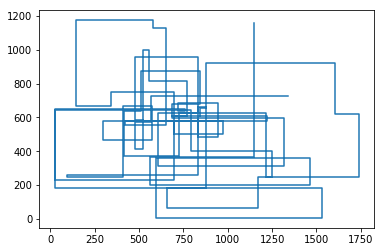

In [7]:
import matplotlib.pyplot as plt
df2 = df
best_perm = min(ep_best, key = lambda t: t[1])
print('Min route length: %s' %best_perm[1])
df2['perm'] = np.array(best_perm[0])*2

df2 = df2.set_index(df['perm']).drop(columns = ['perm'])

for k in range(1, 103, 2):
    df2.loc[k] = np.array([0,df2.loc[k+1,'x'],df2.loc[k-1,'y']])

df2 = df2.sort_index()

plt.plot(df2.x, df2.y)
plt.show()